## 0.0 Imports

In [1]:
import pandas as pd
import inflection
import math
import numpy as np

import seaborn as sns

from matplotlib import pyplot as plt
from IPython.core.display import HTML
from IPython.core.display import Image

0.1 Helper functions

In [2]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use('bmh')
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML('<style>.container { width:100% !important; } </style>'))
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option('display.expand_frame_repr', False)
    
    sns.set()


jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


0.2 Loading Data

In [3]:
df1 = pd.read_csv('./rossmann-store-sales/store.csv', low_memory = False)
df2 = pd.read_csv('./rossmann-store-sales/train.csv', low_memory = False)



In [4]:
df1.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [5]:
df2.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [6]:
# merging both spreadsheets on Store.
df = pd.merge(df2, df1, how = 'left', on = 'Store')

In [7]:
df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

## 1.0 - Data Description

 1.1 - Column Renaming

In [8]:
snakecase = lambda x: inflection.underscore(x)

cols = list(df.columns)
print(cols)
print()
cols = list(map(snakecase, cols))
print(cols)
print()
df.columns = cols
df.columns

['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']

['store', 'day_of_week', 'date', 'sales', 'customers', 'open', 'promo', 'state_holiday', 'school_holiday', 'store_type', 'assortment', 'competition_distance', 'competition_open_since_month', 'competition_open_since_year', 'promo2', 'promo2_since_week', 'promo2_since_year', 'promo_interval']



Index(['store', 'day_of_week', 'date', 'sales', 'customers', 'open', 'promo',
       'state_holiday', 'school_holiday', 'store_type', 'assortment',
       'competition_distance', 'competition_open_since_month',
       'competition_open_since_year', 'promo2', 'promo2_since_week',
       'promo2_since_year', 'promo_interval'],
      dtype='object')

1.2 - Data Dimension

In [9]:
print(f'# of Rows: {df.shape[0]}')
print(f'# of Columns: {df.shape[1]}')

# of Rows: 1017209
# of Columns: 18


1.3 - Data Types

In [10]:
df['date'] = pd.to_datetime(df.date)
df.dtypes


store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

1.4 - Check NA

In [11]:
df.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

1.5 - Fillout NAs   -- rever pode ter diferencas, nao usei o apply, usei o lambda direto...

In [12]:
#competition_distance - hypothesis NA = very far away...
print(df.competition_distance.max())
#set it to 200k on NAs
#df.competition_distance = df['competition_distance'].fillna(200000.0)
df.competition_distance = df['competition_distance'].apply(lambda x: 200000.0 if math.isnan(x) else x)


#df.isna().sum()

#comp open since mon ... Theres a competitor at all? Or was it there before we open?
# assuming if no info, there is the distance that later on can serve as proxy for the 'influence' of a non-existent competitor
# so let´s fill this as the same date of store opening.
print(df.competition_open_since_month.unique())
# df['date'].dt.month
df.competition_open_since_month = df.apply( lambda x: x['date'].month if math.isnan(x['competition_open_since_month']) else x['competition_open_since_month'], axis = 1)
print(f'mo: {df.competition_open_since_month.unique()}')
# # same approach for year:
print()
print( df.competition_open_since_year.unique() )
df.competition_open_since_year = df.apply(lambda x: x['date'].year if math.isnan(x['competition_open_since_year']) else x['competition_open_since_year'], axis = 1)
print( df.competition_open_since_year.unique() )

# #just using same approach for treating - HOWEVER to check on logic of that.
df.promo2_since_week = df.apply(lambda x: x['date'].week if math.isnan(x['promo2_since_week']) else x['promo2_since_week'], axis = 1)
df.promo2_since_year = df.apply(lambda x: x['date'].year if math.isnan(x['promo2_since_year']) else x['promo2_since_year'] , axis = 1)
# #promo interval:
month_map = {1: 'Jan', 2:'Feb', 3: 'Mar', 4: 'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Ago', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
print(month_map)

print(f'month_interval {df.promo_interval.unique()}')
df['promo_interval'].fillna(0, inplace=True)
df['month_map'] = df['date'].dt.month.map(month_map)

df.promo_interval = df[['promo_interval','month_map']].apply( lambda x: 0 if x['promo_interval'] == 0 else 1 if x['month_map'] in x['promo_interval'].split(',') else 0, axis =1)

75860.0
[ 9. 11. 12.  4. 10.  8. nan  3.  6.  5.  1.  2.  7.]
mo: [ 9. 11. 12.  4. 10.  8.  7.  3.  6.  5.  1.  2.]

[2008. 2007. 2006. 2009. 2015. 2013. 2014. 2000. 2011.   nan 2010. 2005.
 1999. 2003. 2012. 2004. 2002. 1961. 1995. 2001. 1990. 1994. 1900. 1998.]
[2008. 2007. 2006. 2009. 2015. 2013. 2014. 2000. 2011. 2010. 2005. 1999.
 2003. 2012. 2004. 2002. 1961. 1995. 2001. 1990. 1994. 1900. 1998.]
{1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Ago', 9: 'Sept', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
month_interval [nan 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']


In [13]:
df.isna().sum()


store                           0
day_of_week                     0
date                            0
sales                           0
customers                       0
open                            0
promo                           0
state_holiday                   0
school_holiday                  0
store_type                      0
assortment                      0
competition_distance            0
competition_open_since_month    0
competition_open_since_year     0
promo2                          0
promo2_since_week               0
promo2_since_year               0
promo_interval                  0
month_map                       0
dtype: int64

1.6 Changing Data Types

In [14]:
df.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                           int64
month_map                               object
dtype: object

In [15]:
df.competition_open_since_month = df['competition_open_since_month'].astype(int)
df.competition_open_since_year =  df['competition_open_since_year'].astype(int)
df.dtypes

df.promo2_since_week = df['promo2_since_week'].astype(int)
df.promo2_since_year = df['promo2_since_year'].astype(int)

1.7  Descriptive Stats

In [16]:
num_types = df.select_dtypes(include = ['int64','float64','int32'])
cat_types = df.select_dtypes(exclude = ['int64','float64','datetime64[ns]'])
print(df.dtypes)
num_types.to_pickle('./2 - num_types')
cat_types.to_pickle('./2 - cat_types')
#print(num_types)
# num_types.hist(bins = 25)

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month             int32
competition_open_since_year              int32
promo2                                   int64
promo2_since_week                        int32
promo2_since_year                        int32
promo_interval                           int64
month_map                               object
dtype: object


1.7.1 - Numerical Atributes

In [17]:
# Central tendency  mean, median
ct1 = pd.DataFrame( num_types.apply(np.mean)).T
# print(ct1)
ct2 = pd.DataFrame( num_types.apply(np.median)).T
# print('---')
# print(ct2)


# Dispertion   std, min, max, range, skew, kurtosis

d1 = pd.DataFrame( num_types.apply(np.std)).T
d2 = pd.DataFrame( num_types.apply(min)).T
d3 = pd.DataFrame( num_types.apply(max)).T
d4 = pd.DataFrame( num_types.apply(lambda x: x.max() - x.min() )).T
d5 = pd.DataFrame( num_types.apply(lambda x: x.skew() )).T
d6 = pd.DataFrame( num_types.apply(lambda x: x.kurtosis )).T

# concatenating:

m = pd.concat([d2,d3,d4,ct1,ct2,d1,d5,d6]).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']

print(m)




                      attributes     min       max     range         mean  median           std       skew                                           kurtosis
0                          store     1.0    1115.0    1114.0   558.429727   558.0    321.908493  -0.000955  <bound method NDFrame._add_numeric_operations....
1                    day_of_week     1.0       7.0       6.0     3.998341     4.0       1.99739   0.001593  <bound method NDFrame._add_numeric_operations....
2                          sales     0.0   41551.0   41551.0  5773.818972  5744.0   3849.924283    0.64146  <bound method NDFrame._add_numeric_operations....
3                      customers     0.0    7388.0    7388.0   633.145946   609.0    464.411506    1.59865  <bound method NDFrame._add_numeric_operations....
4                           open     0.0       1.0       1.0     0.830107     1.0      0.375539  -1.758045  <bound method NDFrame._add_numeric_operations....
5                          promo     0.0       1.0  

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='competition_distance', ylabel='Density'>

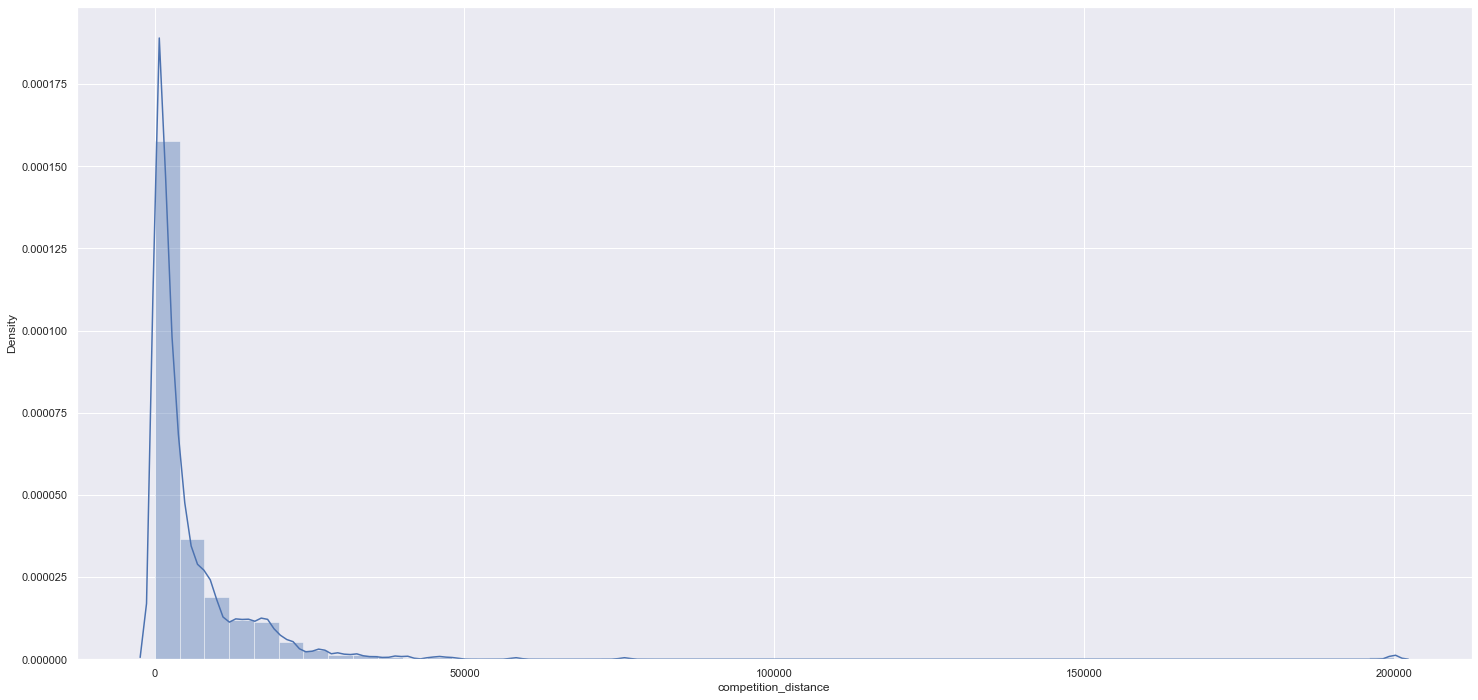

In [18]:
# sns.displot(df['competition_distance'])
sns.distplot(df['competition_distance']) #, kde = False)

1.7.2 - Categoral Atributes

In [19]:
# print(cat_types)
cat_types.apply( lambda x: x.unique().shape[0])

state_holiday                    4
store_type                       4
assortment                       3
competition_open_since_month    12
competition_open_since_year     23
promo2_since_week               52
promo2_since_year                7
month_map                       12
dtype: int64

<AxesSubplot:xlabel='state_holiday', ylabel='sales'>

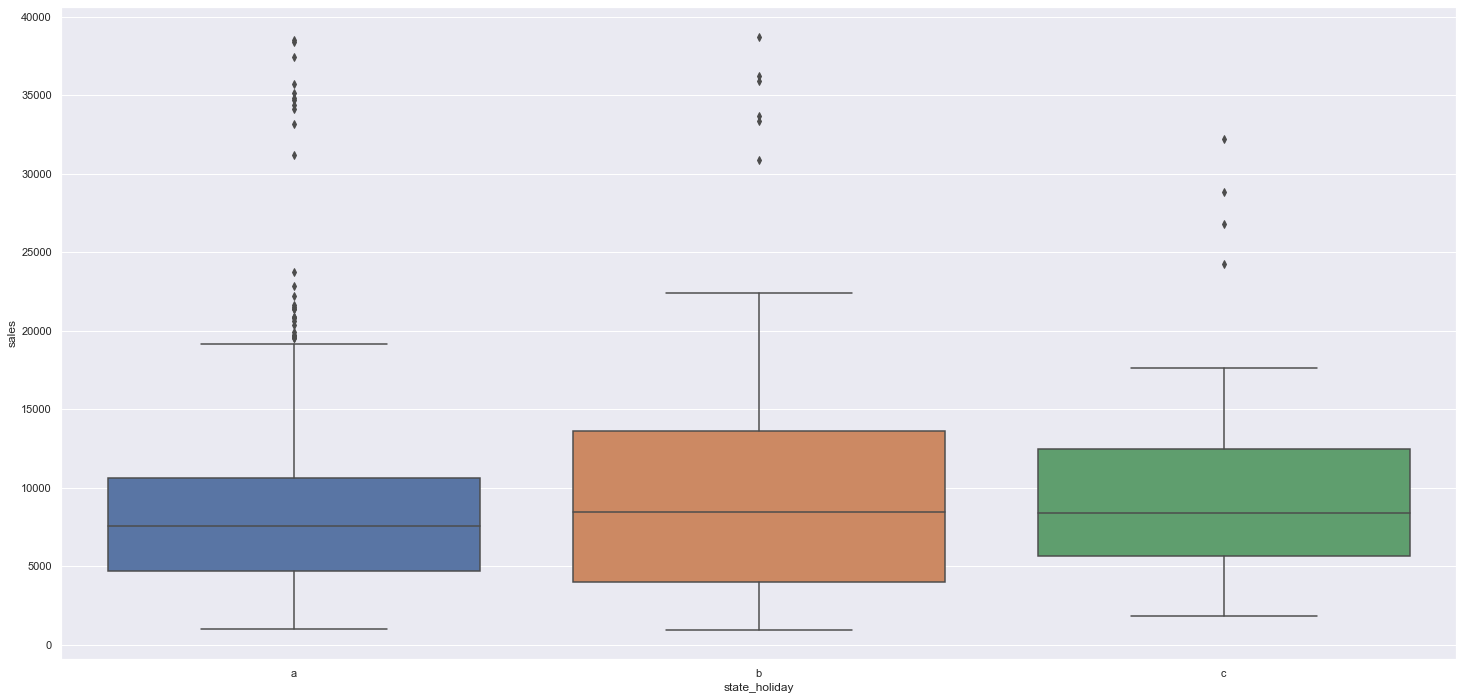

In [20]:
aux = df[(df['state_holiday'] != '0') & (df['sales'] > 0)]


sns.boxplot(x='state_holiday', y='sales', data=aux)

<AxesSubplot:xlabel='assortment', ylabel='sales'>

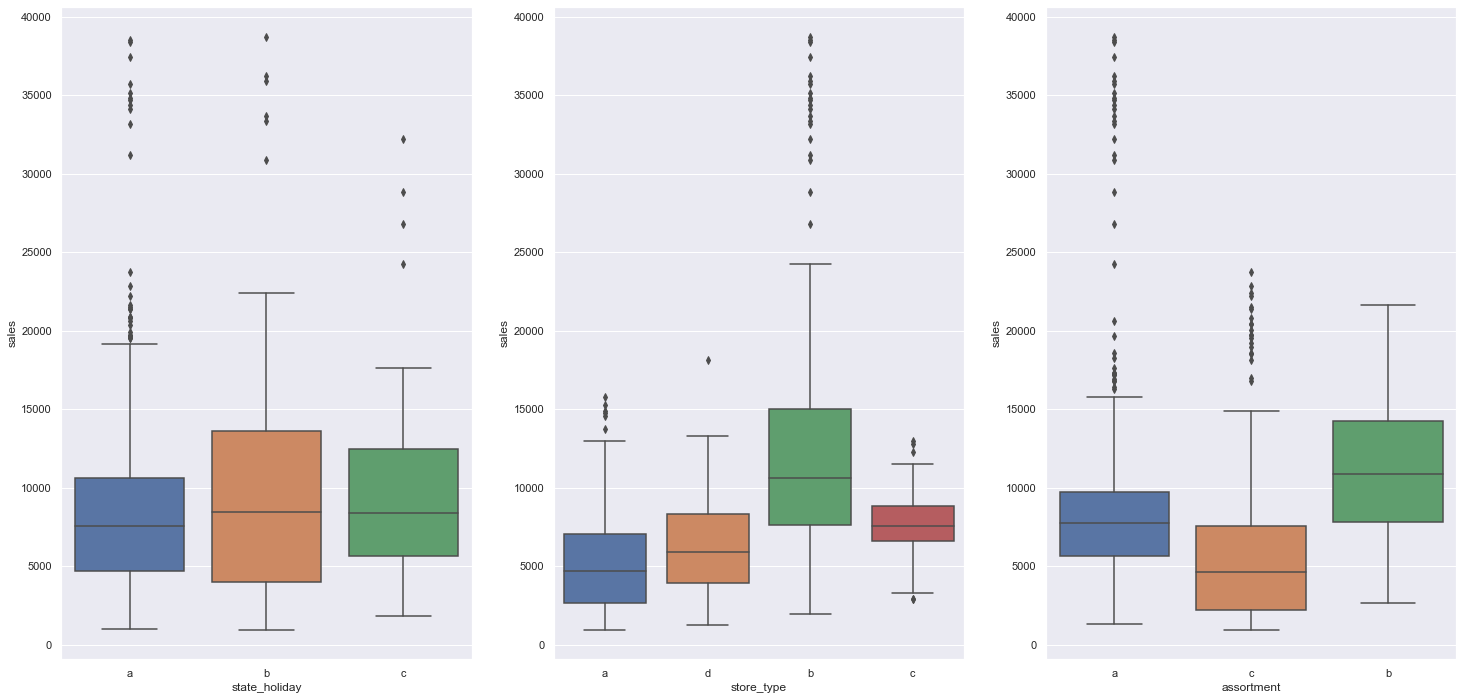

In [21]:
# Now using matplot to grid the boxplots:  (from matplotlib import pyplot as plt)
# plt.subplot( num linhas, num colunas, posicao atual)
plt.subplot(1, 3, 1)
sns.boxplot(x='state_holiday', y='sales', data=aux)
plt.subplot(1, 3, 2)
sns.boxplot(x='store_type', y='sales', data=aux)
plt.subplot(1, 3, 3)
sns.boxplot(x='assortment', y='sales', data=aux)

<AxesSubplot:xlabel='state_holiday', ylabel='sales'>

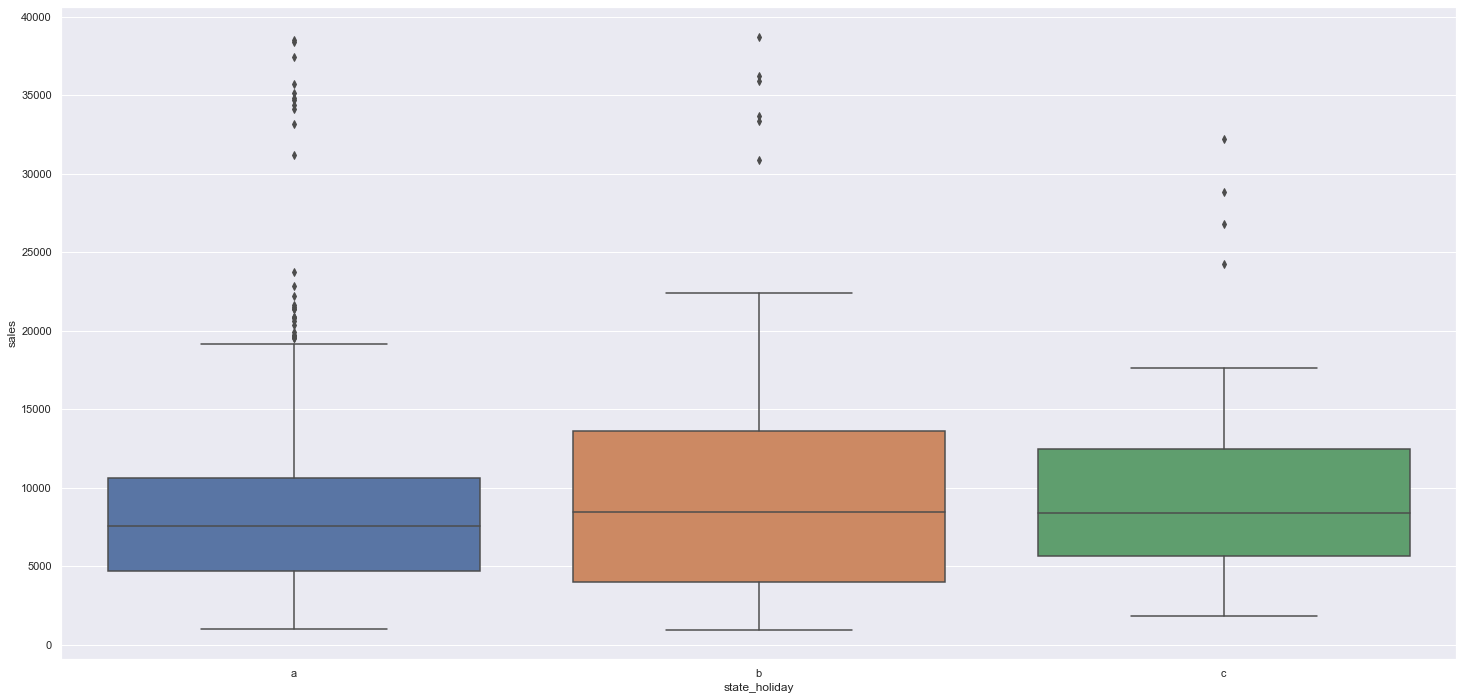

In [22]:
sns.boxplot(x='state_holiday', y='sales', data=aux)

In [23]:
df.to_pickle('./01.pkl')

# 2.0 - FEATURE ENGINEERING

In [24]:
df2 = pd.read_pickle('./01.pkl')

In [25]:
# df2  ## Crashes? Taking forever to respond.

In [26]:
df2.sample(20)

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval,month_map
451953,49,4,2014-05-22,6307,473,1,1,0,0,d,c,18010.0,9,2007,0,21,2014,0,May
36062,383,1,2015-06-29,21002,2373,1,1,0,0,a,c,350.0,6,2015,0,27,2015,0,Jun
703957,63,2,2013-10-08,6625,589,1,1,0,1,c,c,3700.0,6,2010,1,18,2010,0,Oct
471572,713,1,2014-05-05,13101,1491,1,1,0,0,a,c,220.0,5,2014,1,10,2014,0,May
846908,294,7,2013-06-02,0,0,0,0,0,0,a,a,3150.0,5,2005,0,22,2013,0,Jun
47818,989,5,2015-06-19,6032,673,1,1,0,0,a,a,1640.0,6,2006,1,40,2011,0,Jun
483613,489,4,2014-04-24,6063,655,1,0,0,0,a,a,14960.0,11,2013,1,37,2009,1,Apr
953141,602,3,2013-02-27,5769,611,1,0,0,0,a,a,2710.0,7,2001,1,22,2012,0,Feb
806177,818,2,2013-07-09,4228,506,1,0,0,1,d,a,490.0,7,2013,1,35,2010,0,Jul
785120,946,7,2013-07-28,0,0,0,0,0,0,a,a,2220.0,12,2011,1,14,2015,1,Jul


2.1 - MindMap Hypothesis Sales

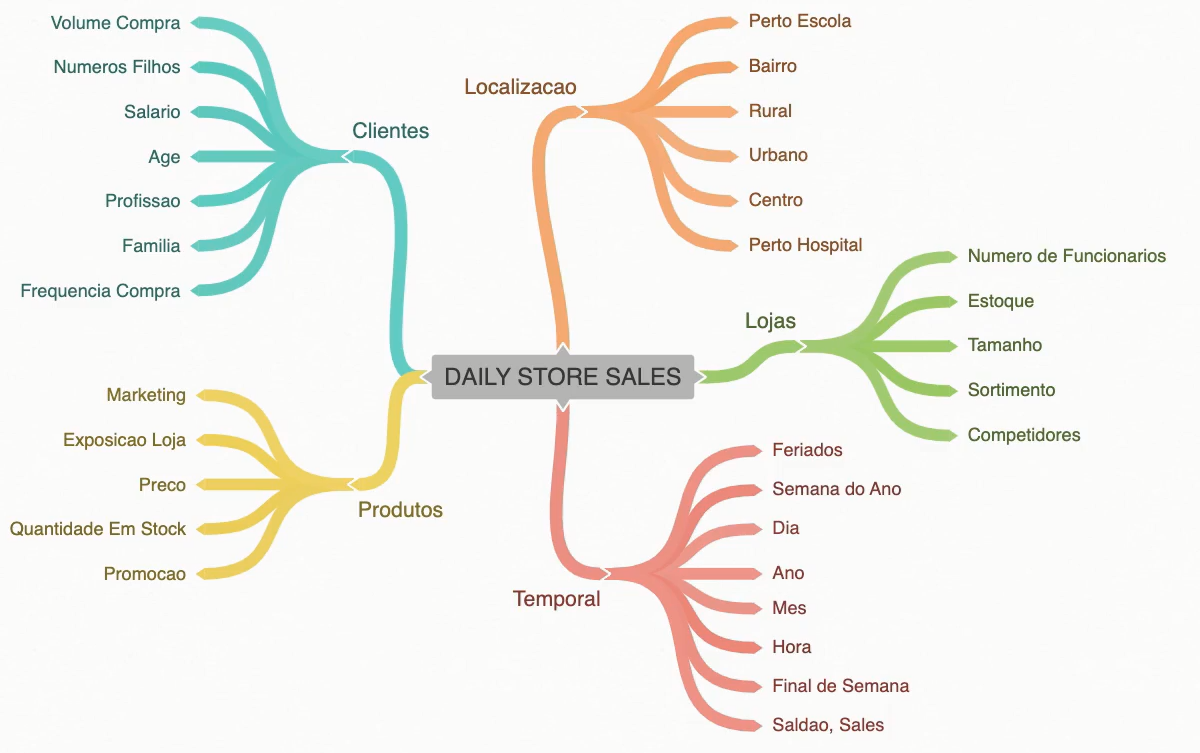

In [27]:
Image('./2 - image.png')

2.2 - Hypothesis on Sales

1 - Stores with more sortment items should sell more.

2 - Stores with more nearby competitors sell less.

3 - Stores with competetors from long date sell more.

4 - Stores with active promotions for more time sell more.

5 - Stores with less promotion days sell more.

6 - 

7 - Stores with more consecutive promotions sell more.

8 - Stores open on Chrimas sell more

9 - Stores shouls sell more the throughout the years.

10 - Stores should sell more at the 2nd semester.

11 - Stores sell more after the 10th on each month.

12 - Stores sell less on weekends.

13 - Stores sell less during school holidays.


2.3 - Feature Engineering

In [28]:
df2.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month             int32
competition_open_since_year              int32
promo2                                   int64
promo2_since_week                        int32
promo2_since_year                        int32
promo_interval                           int64
month_map                               object
dtype: object

In [29]:
# year column creation
df2.sample(4)

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval,month_map
621595,211,6,2013-12-21,13402,1440,1,0,0,0,a,c,350.0,11,2006,0,51,2013,0,Dec
788134,615,4,2013-07-25,7369,1014,1,0,0,1,d,a,730.0,8,2007,0,30,2013,0,Jul
118436,247,4,2015-04-16,8245,673,1,1,0,0,d,c,70.0,11,2010,1,5,2013,0,Apr
170680,86,6,2015-02-28,4218,572,1,0,0,0,a,a,480.0,2,2005,1,31,2013,0,Feb


In [30]:
df2['year'] = df2['date'].dt.year
df2.sample(5)

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval,month_map,year
844283,1014,3,2013-06-05,12933,1463,1,1,0,0,a,c,210.0,6,2013,1,31,2013,0,Jun,2013
823457,258,7,2013-06-23,0,0,0,0,0,0,a,a,27190.0,7,2010,1,37,2009,0,Jun,2013
879164,215,6,2013-05-04,6648,546,1,0,0,0,d,a,150.0,5,2013,1,45,2009,1,May,2013
874889,400,3,2013-05-08,7608,1211,1,0,0,0,a,a,70.0,11,2004,1,14,2011,0,May,2013
592558,164,4,2014-01-16,4376,527,1,0,0,0,a,a,1160.0,9,2005,1,13,2010,1,Jan,2014


In [31]:
# month column
df2['month'] = df2['date'].dt.month
df2.sample(5)

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval,month_map,year,month
186075,986,7,2015-02-15,0,0,0,0,0,0,a,a,620.0,10,2014,1,18,2014,1,Feb,2015,2
728178,869,2,2013-09-17,4663,796,1,0,0,0,c,a,230.0,10,2001,1,14,2011,0,Sept,2013,9
144269,435,2,2015-03-24,3222,378,1,0,0,0,a,a,910.0,3,2015,0,13,2015,0,Mar,2015,3
272036,156,7,2014-11-23,0,0,0,0,0,0,a,a,2020.0,2,2011,1,14,2011,0,Nov,2014,11
646531,617,5,2013-11-29,7991,708,1,0,0,0,a,c,8940.0,11,2013,1,9,2011,0,Nov,2013,11


In [32]:
df2['day'] = df2['date'].dt.day
df2.sample(5)

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval,month_map,year,month,day
231345,541,1,2015-01-05,10522,1222,1,1,0,1,a,c,650.0,7,1990,0,2,2015,0,Jan,2015,1,5
84409,785,7,2015-05-17,0,0,0,0,0,0,d,c,970.0,7,2005,1,31,2013,1,May,2015,5,17
368549,397,2,2014-08-12,4408,624,1,0,0,1,a,c,130.0,8,2014,1,27,2013,0,Ago,2014,8,12
946273,424,2,2013-03-05,6593,737,1,1,0,0,d,c,1250.0,3,2013,1,40,2011,0,Mar,2013,3,5
255528,535,4,2014-12-11,7884,899,1,0,0,0,a,a,3570.0,4,2007,0,50,2014,0,Dec,2014,12,11


In [33]:
# week of year
df2['week_of_year'] = df2['date'].dt.weekofyear
df2.sample(5)

<ipython-input-33-468f8c12a42e>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df2['week_of_year'] = df2['date'].dt.weekofyear


,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval,month_map,year,month,day,week_of_year
154982,1113,7,2015-03-15,0,0,0,0,0,0,a,c,9260.0,3,2015,0,11,2015,0,Mar,2015,3,15,11
572016,807,2,2014-02-04,11710,1128,1,1,0,0,a,a,3870.0,4,2008,0,6,2014,0,Feb,2014,2,4,6
383218,53,7,2014-07-27,0,0,0,0,0,0,a,c,30360.0,9,2013,0,30,2014,0,Jul,2014,7,27,30
797058,619,3,2013-07-17,5002,483,1,1,0,0,a,a,1600.0,6,2006,1,45,2009,0,Jul,2013,7,17,29
899902,883,2,2013-04-16,4101,491,1,0,0,0,a,a,3200.0,6,2005,0,16,2013,0,Apr,2013,4,16,16


In [34]:
# year - week
df2['year_week'] = df2['date'].dt.strftime('%Y-%W')
df2.sample(5)

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval,month_map,year,month,day,week_of_year,year_week
952444,1020,4,2013-02-28,6756,850,1,0,0,0,a,a,40.0,8,2015,0,9,2013,0,Feb,2013,2,28,9,2013-08
543736,402,6,2014-03-01,6623,742,1,0,0,0,c,c,5830.0,9,2011,1,13,2010,0,Mar,2014,3,1,9,2014-08
1012673,1039,6,2013-01-05,7880,1102,1,0,0,0,a,c,70.0,6,1990,1,22,2012,0,Jan,2013,1,5,1,2013-00
158517,188,3,2015-03-11,3410,347,1,0,0,0,d,a,850.0,3,2015,1,18,2011,0,Mar,2015,3,11,11,2015-10
19989,1035,2,2015-07-14,7008,740,1,1,0,1,a,a,27150.0,7,2015,0,29,2015,0,Jul,2015,7,14,29,2015-28


In [35]:
# competition since
df2['competition_since'] = df2.apply(lambda x: datetime.datetime(year = x['competition_open_since_year'], month = x['competition_open_since_month'], day = 1), axis = 1)
df2.sample(5)

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval,month_map,year,month,day,week_of_year,year_week,competition_since
742968,49,2,2013-09-03,5283,412,1,0,0,1,d,c,18010.0,9,2007,0,36,2013,0,Sept,2013,9,3,36,2013-35,2007-09-01
479423,759,1,2014-04-28,11760,1107,1,1,0,0,a,a,110.0,11,2012,1,31,2013,0,Apr,2014,4,28,18,2014-17,2012-11-01
100250,1016,7,2015-05-03,0,0,0,0,0,0,c,c,550.0,5,2015,1,35,2010,0,May,2015,5,3,18,2015-17,2015-05-01
340088,1025,5,2014-09-12,5539,720,1,0,0,0,a,a,720.0,11,2009,0,37,2014,0,Sept,2014,9,12,37,2014-36,2009-11-01
487890,306,7,2014-04-20,0,0,0,0,0,0,a,a,5100.0,4,2007,1,40,2014,1,Apr,2014,4,20,16,2014-15,2007-04-01


In [36]:
# competition length time in months
df2['competition_length_months'] = ((df2['date'] - df2['competition_since'])/30) #.apply(lambda x: x.days )
df2.head(5)

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval,month_map,year,month,day,week_of_year,year_week,competition_since,competition_length_months
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9,2008,0,31,2015,0,Jul,2015,7,31,31,2015-30,2008-09-01,84 days 03:12:00
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11,2007,1,13,2010,1,Jul,2015,7,31,31,2015-30,2007-11-01,94 days 07:12:00
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12,2006,1,14,2011,1,Jul,2015,7,31,31,2015-30,2006-12-01,105 days 11:12:00
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9,2009,0,31,2015,0,Jul,2015,7,31,31,2015-30,2009-09-01,71 days 23:12:00
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4,2015,0,31,2015,0,Jul,2015,7,31,31,2015-30,2015-04-01,4 days 00:48:00


In [37]:
df2['competition_length_months'] = ((df2['date'] - df2['competition_since'])/30).apply(lambda x: x.days ).astype(int)
df2.head(5)

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval,month_map,year,month,day,week_of_year,year_week,competition_since,competition_length_months
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9,2008,0,31,2015,0,Jul,2015,7,31,31,2015-30,2008-09-01,84
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11,2007,1,13,2010,1,Jul,2015,7,31,31,2015-30,2007-11-01,94
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12,2006,1,14,2011,1,Jul,2015,7,31,31,2015-30,2006-12-01,105
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9,2009,0,31,2015,0,Jul,2015,7,31,31,2015-30,2009-09-01,71
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4,2015,0,31,2015,0,Jul,2015,7,31,31,2015-30,2015-04-01,4


In [38]:
df2['promo_since'] = df2['promo2_since_year'].astype(str) + '-' + df['promo2_since_week'].astype(str)
df2.head(10)

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval,month_map,year,month,day,week_of_year,year_week,competition_since,competition_length_months,promo_since
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9,2008,0,31,2015,0,Jul,2015,7,31,31,2015-30,2008-09-01,84,2015-31
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11,2007,1,13,2010,1,Jul,2015,7,31,31,2015-30,2007-11-01,94,2010-13
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12,2006,1,14,2011,1,Jul,2015,7,31,31,2015-30,2006-12-01,105,2011-14
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9,2009,0,31,2015,0,Jul,2015,7,31,31,2015-30,2009-09-01,71,2015-31
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4,2015,0,31,2015,0,Jul,2015,7,31,31,2015-30,2015-04-01,4,2015-31
5,6,5,2015-07-31,5651,589,1,1,0,1,a,a,310.0,12,2013,0,31,2015,0,Jul,2015,7,31,31,2015-30,2013-12-01,20,2015-31
6,7,5,2015-07-31,15344,1414,1,1,0,1,a,c,24000.0,4,2013,0,31,2015,0,Jul,2015,7,31,31,2015-30,2013-04-01,28,2015-31
7,8,5,2015-07-31,8492,833,1,1,0,1,a,a,7520.0,10,2014,0,31,2015,0,Jul,2015,7,31,31,2015-30,2014-10-01,10,2015-31
8,9,5,2015-07-31,8565,687,1,1,0,1,a,c,2030.0,8,2000,0,31,2015,0,Jul,2015,7,31,31,2015-30,2000-08-01,182,2015-31
9,10,5,2015-07-31,7185,681,1,1,0,1,a,a,3160.0,9,2009,0,31,2015,0,Jul,2015,7,31,31,2015-30,2009-09-01,71,2015-31


In [39]:
df2['promo_since'] = df2['promo_since'].apply(lambda x: datetime.datetime.strptime(x+ '-1', '%Y-%W-%w') - datetime.timedelta(days = 7))
df2.head(10)

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval,month_map,year,month,day,week_of_year,year_week,competition_since,competition_length_months,promo_since
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9,2008,0,31,2015,0,Jul,2015,7,31,31,2015-30,2008-09-01,84,2015-07-27
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11,2007,1,13,2010,1,Jul,2015,7,31,31,2015-30,2007-11-01,94,2010-03-22
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12,2006,1,14,2011,1,Jul,2015,7,31,31,2015-30,2006-12-01,105,2011-03-28
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9,2009,0,31,2015,0,Jul,2015,7,31,31,2015-30,2009-09-01,71,2015-07-27
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4,2015,0,31,2015,0,Jul,2015,7,31,31,2015-30,2015-04-01,4,2015-07-27
5,6,5,2015-07-31,5651,589,1,1,0,1,a,a,310.0,12,2013,0,31,2015,0,Jul,2015,7,31,31,2015-30,2013-12-01,20,2015-07-27
6,7,5,2015-07-31,15344,1414,1,1,0,1,a,c,24000.0,4,2013,0,31,2015,0,Jul,2015,7,31,31,2015-30,2013-04-01,28,2015-07-27
7,8,5,2015-07-31,8492,833,1,1,0,1,a,a,7520.0,10,2014,0,31,2015,0,Jul,2015,7,31,31,2015-30,2014-10-01,10,2015-07-27
8,9,5,2015-07-31,8565,687,1,1,0,1,a,c,2030.0,8,2000,0,31,2015,0,Jul,2015,7,31,31,2015-30,2000-08-01,182,2015-07-27
9,10,5,2015-07-31,7185,681,1,1,0,1,a,a,3160.0,9,2009,0,31,2015,0,Jul,2015,7,31,31,2015-30,2009-09-01,71,2015-07-27


In [40]:
# df2['promo_since'] = df2['promo_since_aux']

df2['promo_time_week'] = ((df2['date'] - df2['promo_since']) /7).apply(lambda x: x.days).astype(int)

In [41]:
df2.head(5)

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval,month_map,year,month,day,week_of_year,year_week,competition_since,competition_length_months,promo_since,promo_time_week
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9,2008,0,31,2015,0,Jul,2015,7,31,31,2015-30,2008-09-01,84,2015-07-27,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11,2007,1,13,2010,1,Jul,2015,7,31,31,2015-30,2007-11-01,94,2010-03-22,279
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12,2006,1,14,2011,1,Jul,2015,7,31,31,2015-30,2006-12-01,105,2011-03-28,226
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9,2009,0,31,2015,0,Jul,2015,7,31,31,2015-30,2009-09-01,71,2015-07-27,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4,2015,0,31,2015,0,Jul,2015,7,31,31,2015-30,2015-04-01,4,2015-07-27,0


In [42]:
#####################

In [43]:
# Store Assortment
df2['assortment'] = df2['assortment'].apply(lambda x: 'basic' if x == 'a' else 'extra' if x == 'b' else 'extended' if x == 'c' else x)
df2.sample(12)

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval,month_map,year,month,day,week_of_year,year_week,competition_since,competition_length_months,promo_since,promo_time_week
603449,1020,2,2014-01-07,9736,1172,1,1,0,1,a,basic,40.0,8,2015,0,2,2014,0,Jan,2014,1,7,2,2014-01,2015-08-01,-20,2014-01-06,0
360537,882,4,2014-08-21,5432,753,1,1,0,0,a,basic,30.0,4,2013,0,34,2014,0,Ago,2014,8,21,34,2014-33,2013-04-01,16,2014-08-18,0
359137,330,5,2014-08-22,4615,525,1,1,0,0,a,extended,370.0,8,2014,1,22,2012,0,Ago,2014,8,22,34,2014-33,2014-08-01,0,2012-05-21,117
668900,686,6,2013-11-09,2690,309,1,0,0,0,a,basic,20050.0,4,2002,0,45,2013,0,Nov,2013,11,9,45,2013-44,2002-04-01,141,2013-11-04,0
571345,136,2,2014-02-04,8563,579,1,1,0,0,a,extended,2200.0,12,2010,1,22,2012,1,Feb,2014,2,4,6,2014-05,2010-12-01,38,2012-05-21,89
785242,1068,7,2013-07-28,0,0,0,0,0,0,d,extended,5010.0,7,2013,1,5,2013,1,Jul,2013,7,28,30,2013-29,2013-07-01,0,2013-01-28,25
626443,599,2,2013-12-17,13411,1005,1,1,0,0,d,extended,580.0,11,2014,0,51,2013,0,Dec,2013,12,17,51,2013-50,2014-11-01,-11,2013-12-16,0
166775,641,3,2015-03-04,6366,530,1,1,0,0,a,extended,610.0,12,2003,1,36,2013,1,Mar,2015,3,4,10,2015-09,2003-12-01,137,2013-09-02,78
345780,6,5,2014-09-05,5642,628,1,1,0,0,a,basic,310.0,12,2013,0,36,2014,0,Sept,2014,9,5,36,2014-35,2013-12-01,9,2014-09-01,0
806257,898,2,2013-07-09,6143,693,1,0,0,0,a,basic,18540.0,7,2013,0,28,2013,0,Jul,2013,7,9,28,2013-27,2013-07-01,0,2013-07-08,0


In [44]:
# state holiday
# a = public holiday, b = Easter holiday, c = Christmas, 0 = None

df2.state_holiday = df2['state_holiday'].apply(lambda x: 'public_holiday' if x == 'a' else 'easter_holiday' if x =='b' else 'chritsmas' if x == 'c' else 'regular_day' if x == '0' else x)
df2.sample(12)

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval,month_map,year,month,day,week_of_year,year_week,competition_since,competition_length_months,promo_since,promo_time_week
907650,826,2,2013-04-09,9212,789,1,1,regular_day,0,a,extended,7980.0,6,2005,0,15,2013,0,Apr,2013,4,9,15,2013-14,2005-06-01,95,2013-04-08,0
381772,559,2,2014-07-29,7880,906,1,1,regular_day,1,d,basic,3910.0,11,2006,1,5,2013,0,Jul,2014,7,29,31,2014-30,2006-11-01,94,2013-01-28,78
399438,441,4,2014-07-10,5391,613,1,0,regular_day,1,d,basic,2530.0,7,2014,0,28,2014,0,Jul,2014,7,10,28,2014-27,2014-07-01,0,2014-07-07,0
954972,203,1,2013-02-25,4475,613,1,0,regular_day,0,c,extended,490.0,11,2002,0,9,2013,0,Feb,2013,2,25,9,2013-08,2002-11-01,125,2013-02-25,0
332915,281,5,2014-09-19,5971,565,1,1,regular_day,0,d,extended,6970.0,9,2011,0,38,2014,0,Sept,2014,9,19,38,2014-37,2011-09-01,37,2014-09-15,0
131667,98,6,2015-04-04,7554,682,1,0,regular_day,0,d,extended,15140.0,12,2006,1,1,2012,1,Apr,2015,4,4,14,2015-13,2006-12-01,101,2011-12-26,170
679761,397,3,2013-10-30,4928,721,1,0,regular_day,1,a,extended,130.0,10,2013,1,27,2013,0,Oct,2013,10,30,44,2013-43,2013-10-01,0,2013-07-01,17
194862,853,6,2015-02-07,7838,840,1,0,regular_day,0,a,basic,14040.0,2,2015,0,6,2015,0,Feb,2015,2,7,6,2015-05,2015-02-01,0,2015-02-02,0
34451,1002,3,2015-07-01,8357,818,1,1,regular_day,0,d,extended,1130.0,11,2008,0,27,2015,0,Jul,2015,7,1,27,2015-26,2008-11-01,81,2015-06-29,0
273081,291,6,2014-11-22,4611,507,1,0,regular_day,0,d,basic,200000.0,11,2014,0,47,2014,0,Nov,2014,11,22,47,2014-46,2014-11-01,0,2014-11-17,0


In [45]:
df2['state_holiday'].unique()

array(['regular_day', 'public_holiday', 'easter_holiday', 'chritsmas'],
      dtype=object)

In [46]:
df2.to_pickle('./02.pkl')

# 3.0 - Extra filtering - Drop lines when closed stores and no sales - Drop redundant columns

In [47]:
df3 = pd.read_pickle('./02.pkl')

In [48]:
df3.head(10)

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval,month_map,year,month,day,week_of_year,year_week,competition_since,competition_length_months,promo_since,promo_time_week
0,1,5,2015-07-31,5263,555,1,1,regular_day,1,c,basic,1270.0,9,2008,0,31,2015,0,Jul,2015,7,31,31,2015-30,2008-09-01,84,2015-07-27,0
1,2,5,2015-07-31,6064,625,1,1,regular_day,1,a,basic,570.0,11,2007,1,13,2010,1,Jul,2015,7,31,31,2015-30,2007-11-01,94,2010-03-22,279
2,3,5,2015-07-31,8314,821,1,1,regular_day,1,a,basic,14130.0,12,2006,1,14,2011,1,Jul,2015,7,31,31,2015-30,2006-12-01,105,2011-03-28,226
3,4,5,2015-07-31,13995,1498,1,1,regular_day,1,c,extended,620.0,9,2009,0,31,2015,0,Jul,2015,7,31,31,2015-30,2009-09-01,71,2015-07-27,0
4,5,5,2015-07-31,4822,559,1,1,regular_day,1,a,basic,29910.0,4,2015,0,31,2015,0,Jul,2015,7,31,31,2015-30,2015-04-01,4,2015-07-27,0
5,6,5,2015-07-31,5651,589,1,1,regular_day,1,a,basic,310.0,12,2013,0,31,2015,0,Jul,2015,7,31,31,2015-30,2013-12-01,20,2015-07-27,0
6,7,5,2015-07-31,15344,1414,1,1,regular_day,1,a,extended,24000.0,4,2013,0,31,2015,0,Jul,2015,7,31,31,2015-30,2013-04-01,28,2015-07-27,0
7,8,5,2015-07-31,8492,833,1,1,regular_day,1,a,basic,7520.0,10,2014,0,31,2015,0,Jul,2015,7,31,31,2015-30,2014-10-01,10,2015-07-27,0
8,9,5,2015-07-31,8565,687,1,1,regular_day,1,a,extended,2030.0,8,2000,0,31,2015,0,Jul,2015,7,31,31,2015-30,2000-08-01,182,2015-07-27,0
9,10,5,2015-07-31,7185,681,1,1,regular_day,1,a,basic,3160.0,9,2009,0,31,2015,0,Jul,2015,7,31,31,2015-30,2009-09-01,71,2015-07-27,0


In [49]:
# drop closed stores and 0 sales:

df3 = df3[(df3['open'] != 0) & (df3['sales'] > 0)]
df3.sample(20)

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval,month_map,year,month,day,week_of_year,year_week,competition_since,competition_length_months,promo_since,promo_time_week
489170,471,6,2014-04-19,8471,811,1,0,regular_day,0,d,basic,5300.0,4,2014,1,45,2009,0,Apr,2014,4,19,16,2014-15,2014-04-01,0,2009-11-02,232
205560,401,3,2015-01-28,8559,733,1,1,regular_day,0,a,extended,9200.0,10,2009,1,14,2012,1,Jan,2015,1,28,5,2015-04,2009-10-01,64,2012-03-26,148
184195,221,1,2015-02-16,7708,660,1,1,regular_day,0,d,extended,13530.0,9,2013,0,8,2015,0,Feb,2015,2,16,8,2015-07,2013-09-01,17,2015-02-16,0
340917,901,4,2014-09-11,5787,635,1,0,regular_day,0,a,extended,3170.0,4,2014,0,37,2014,0,Sept,2014,9,11,37,2014-36,2014-04-01,5,2014-09-08,0
104412,718,3,2015-04-29,9264,921,1,1,regular_day,0,a,basic,1100.0,6,2015,0,18,2015,0,Apr,2015,4,29,18,2015-17,2015-06-01,-2,2015-04-27,0
984856,1097,3,2013-01-30,8272,2320,1,0,regular_day,0,b,extra,720.0,3,2002,0,5,2013,0,Jan,2013,1,30,5,2013-04,2002-03-01,132,2013-01-28,0
335515,29,2,2014-09-16,9022,751,1,1,regular_day,0,d,extended,2170.0,9,2014,0,38,2014,0,Sept,2014,9,16,38,2014-37,2014-09-01,0,2014-09-15,0
619319,165,1,2013-12-23,6773,765,1,0,regular_day,1,a,basic,3720.0,4,2005,1,13,2010,0,Dec,2013,12,23,52,2013-51,2005-04-01,106,2010-03-22,196
689405,6,1,2013-10-21,8085,901,1,1,regular_day,1,a,basic,310.0,12,2013,0,43,2013,0,Oct,2013,10,21,43,2013-42,2013-12-01,-2,2013-10-21,0
343797,988,1,2014-09-08,4110,722,1,0,regular_day,0,a,basic,30.0,11,2012,0,37,2014,0,Sept,2014,9,8,37,2014-36,2012-11-01,22,2014-09-08,0


In [50]:
# drop columns - customer, open, promo_interval month map
cols_to_drop = ['customers','open', 'promo_interval','month_map']
df3 = df3.drop(cols_to_drop, axis = 1)
df3.head(5)

,store,day_of_week,date,sales,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,year,month,day,week_of_year,year_week,competition_since,competition_length_months,promo_since,promo_time_week
0,1,5,2015-07-31,5263,1,regular_day,1,c,basic,1270.0,9,2008,0,31,2015,2015,7,31,31,2015-30,2008-09-01,84,2015-07-27,0
1,2,5,2015-07-31,6064,1,regular_day,1,a,basic,570.0,11,2007,1,13,2010,2015,7,31,31,2015-30,2007-11-01,94,2010-03-22,279
2,3,5,2015-07-31,8314,1,regular_day,1,a,basic,14130.0,12,2006,1,14,2011,2015,7,31,31,2015-30,2006-12-01,105,2011-03-28,226
3,4,5,2015-07-31,13995,1,regular_day,1,c,extended,620.0,9,2009,0,31,2015,2015,7,31,31,2015-30,2009-09-01,71,2015-07-27,0
4,5,5,2015-07-31,4822,1,regular_day,1,a,basic,29910.0,4,2015,0,31,2015,2015,7,31,31,2015-30,2015-04-01,4,2015-07-27,0


In [51]:
df3.to_pickle('./03.pkl')